In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [2]:
def Data_read(name):
    temp = pd.read_csv('data/Data_3_'+ name + ".csv",index_col = [0])
    temp.columns = ['기온','현지기압','풍속','일일 누적강수량','해면기압','일일 누적일사량','습도','풍향']
    return temp
    
def visualize(data,name):
    Columns = ['기온','현지기압','풍속','일일 누적강수량','해면기압','일일 누적일사량','습도','풍향']
    data.iloc[:,Columns.index(name)].iplot(kind = 'scatter',xTitle = 'time',yTitle = name,title = '3일치 데이터 B위치')

def merge(data,data2):
    temp_data = pd.merge(data,data2,left_index = True,right_index = True)
    return temp_data

def Descending_correlation(data):
    temp = data.corr().iloc[:8,8:]
    temp2 = temp.copy()
    temp2 = abs(temp).sort_values(by = ['Y18'],ascending = False)
    return temp2

with open('data/Data_E_Y.pk','rb') as f:
    Data_Label = pickle.load(f)

In [3]:
def Graph(data):
    plt.subplot(8,1,1)
    visualize(data,'기온')
    visualize(data,'현지기압')
    visualize(data,'풍속')
    visualize(data,'일일 누적강수량')
    visualize(data,'해면기압')
    visualize(data,'일일 누적일사량')
    visualize(data,'습도')
    visualize(data,'풍향')

In [4]:
Data_3_B = Data_read('B')

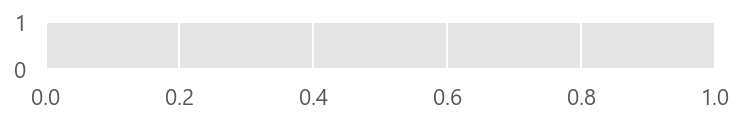

In [5]:
Graph(Data_3_B)

In [8]:
Data_3_B_with_Label = merge(Data_3_B,Data_Label)

In [9]:
Descending_correlation(Data_3_B_with_Label)

,Y18
습도,0.845809
기온,0.832904
해면기압,0.592732
현지기압,0.502424
풍속,0.234911
일일 누적강수량,0.161184
풍향,0.069682
일일 누적일사량,NaN
